In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import os

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score
)

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

print("Path to dataset files:", path)
print(os.listdir(path))

Using Colab cache for faster access to the 'diabetes-health-indicators-dataset' dataset.
Path to dataset files: /kaggle/input/diabetes-health-indicators-dataset
['diabetes_binary_5050split_health_indicators_BRFSS2015.csv', 'diabetes_binary_health_indicators_BRFSS2015.csv', 'diabetes_012_health_indicators_BRFSS2015.csv']


## Load Data

In [4]:
df = pd.read_csv(os.path.join(path, "diabetes_binary_5050split_health_indicators_BRFSS2015.csv"))
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [6]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

Diabetes_binary: [0. 1.]
HighBP: [1. 0.]
HighChol: [0. 1.]
CholCheck: [1. 0.]
BMI: [26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 36. 47.
 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92. 53.
 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 73. 76. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 62.
 64. 66. 85. 70. 83. 80. 78. 74.]
Smoker: [0. 1.]
Stroke: [0. 1.]
HeartDiseaseorAttack: [0. 1.]
PhysActivity: [1. 0.]
Fruits: [0. 1.]
Veggies: [1. 0.]
HvyAlcoholConsump: [0. 1.]
AnyHealthcare: [1. 0.]
NoDocbcCost: [0. 1.]
GenHlth: [3. 1. 2. 4. 5.]
MentHlth: [ 5.  0.  7.  3.  4.  2. 30. 20.  1. 15. 10. 25. 14. 28.  6. 29. 26. 12.
 16. 22. 13.  8.  9. 21. 18. 17. 27. 24. 23. 11. 19.]
PhysHlth: [30.  0. 10.  3.  6.  4. 15.  1.  2. 14.  7. 25. 21. 20.  5.  8. 22. 23.
 29. 12. 18. 28. 26. 24. 27. 11. 13. 16. 17.  9. 19.]
DiffWalk: [0. 1.]
Sex: [1. 0.]
Age: [ 4. 12. 13. 11.  8.  1.  6.  3.  7. 10.  9.  5.  2.]
Education: [6

feature type

In [7]:
ordinal_features = [
    'Age',
    'Income',
    'Education'
]

binary_features = [
    'HighBP',
    'HighChol',
    'CholCheck',
    'Smoker',
    'Stroke',
    'HeartDiseaseorAttack',
    'PhysActivity',
    'Fruits',
    'Veggies',
    'HvyAlcoholConsump',
    'AnyHealthcare',
    'NoDocbcCost',
    'DiffWalk',
    'Sex'
]

countinous_features= [
    'GenHlth',
    'MentHlth',
    'PhysHlth',
    'BMI'
]

## EDA

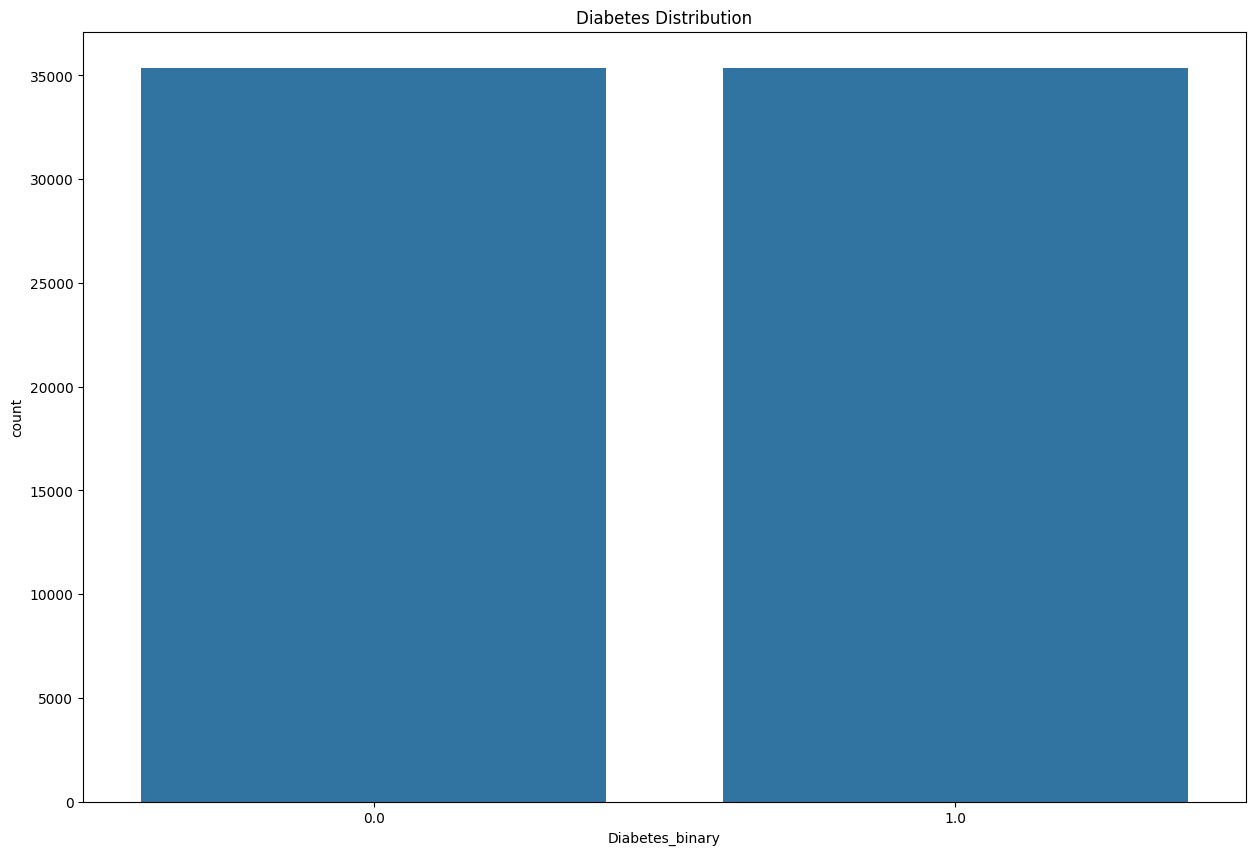

In [8]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Diabetes_binary', data=df)
plt.title('Diabetes Distribution')
plt.show()

binary vs target

In [9]:
binary_feature_pairs = [
    ('HighBP', 'HighChol'),
    ('CholCheck', 'Smoker'),
    ('Stroke', 'HeartDiseaseorAttack'),
    ('PhysActivity', 'Fruits'),
    ('Veggies', 'HvyAlcoholConsump'),
    ('AnyHealthcare', 'NoDocbcCost'),
    ('DiffWalk', 'Sex')
]

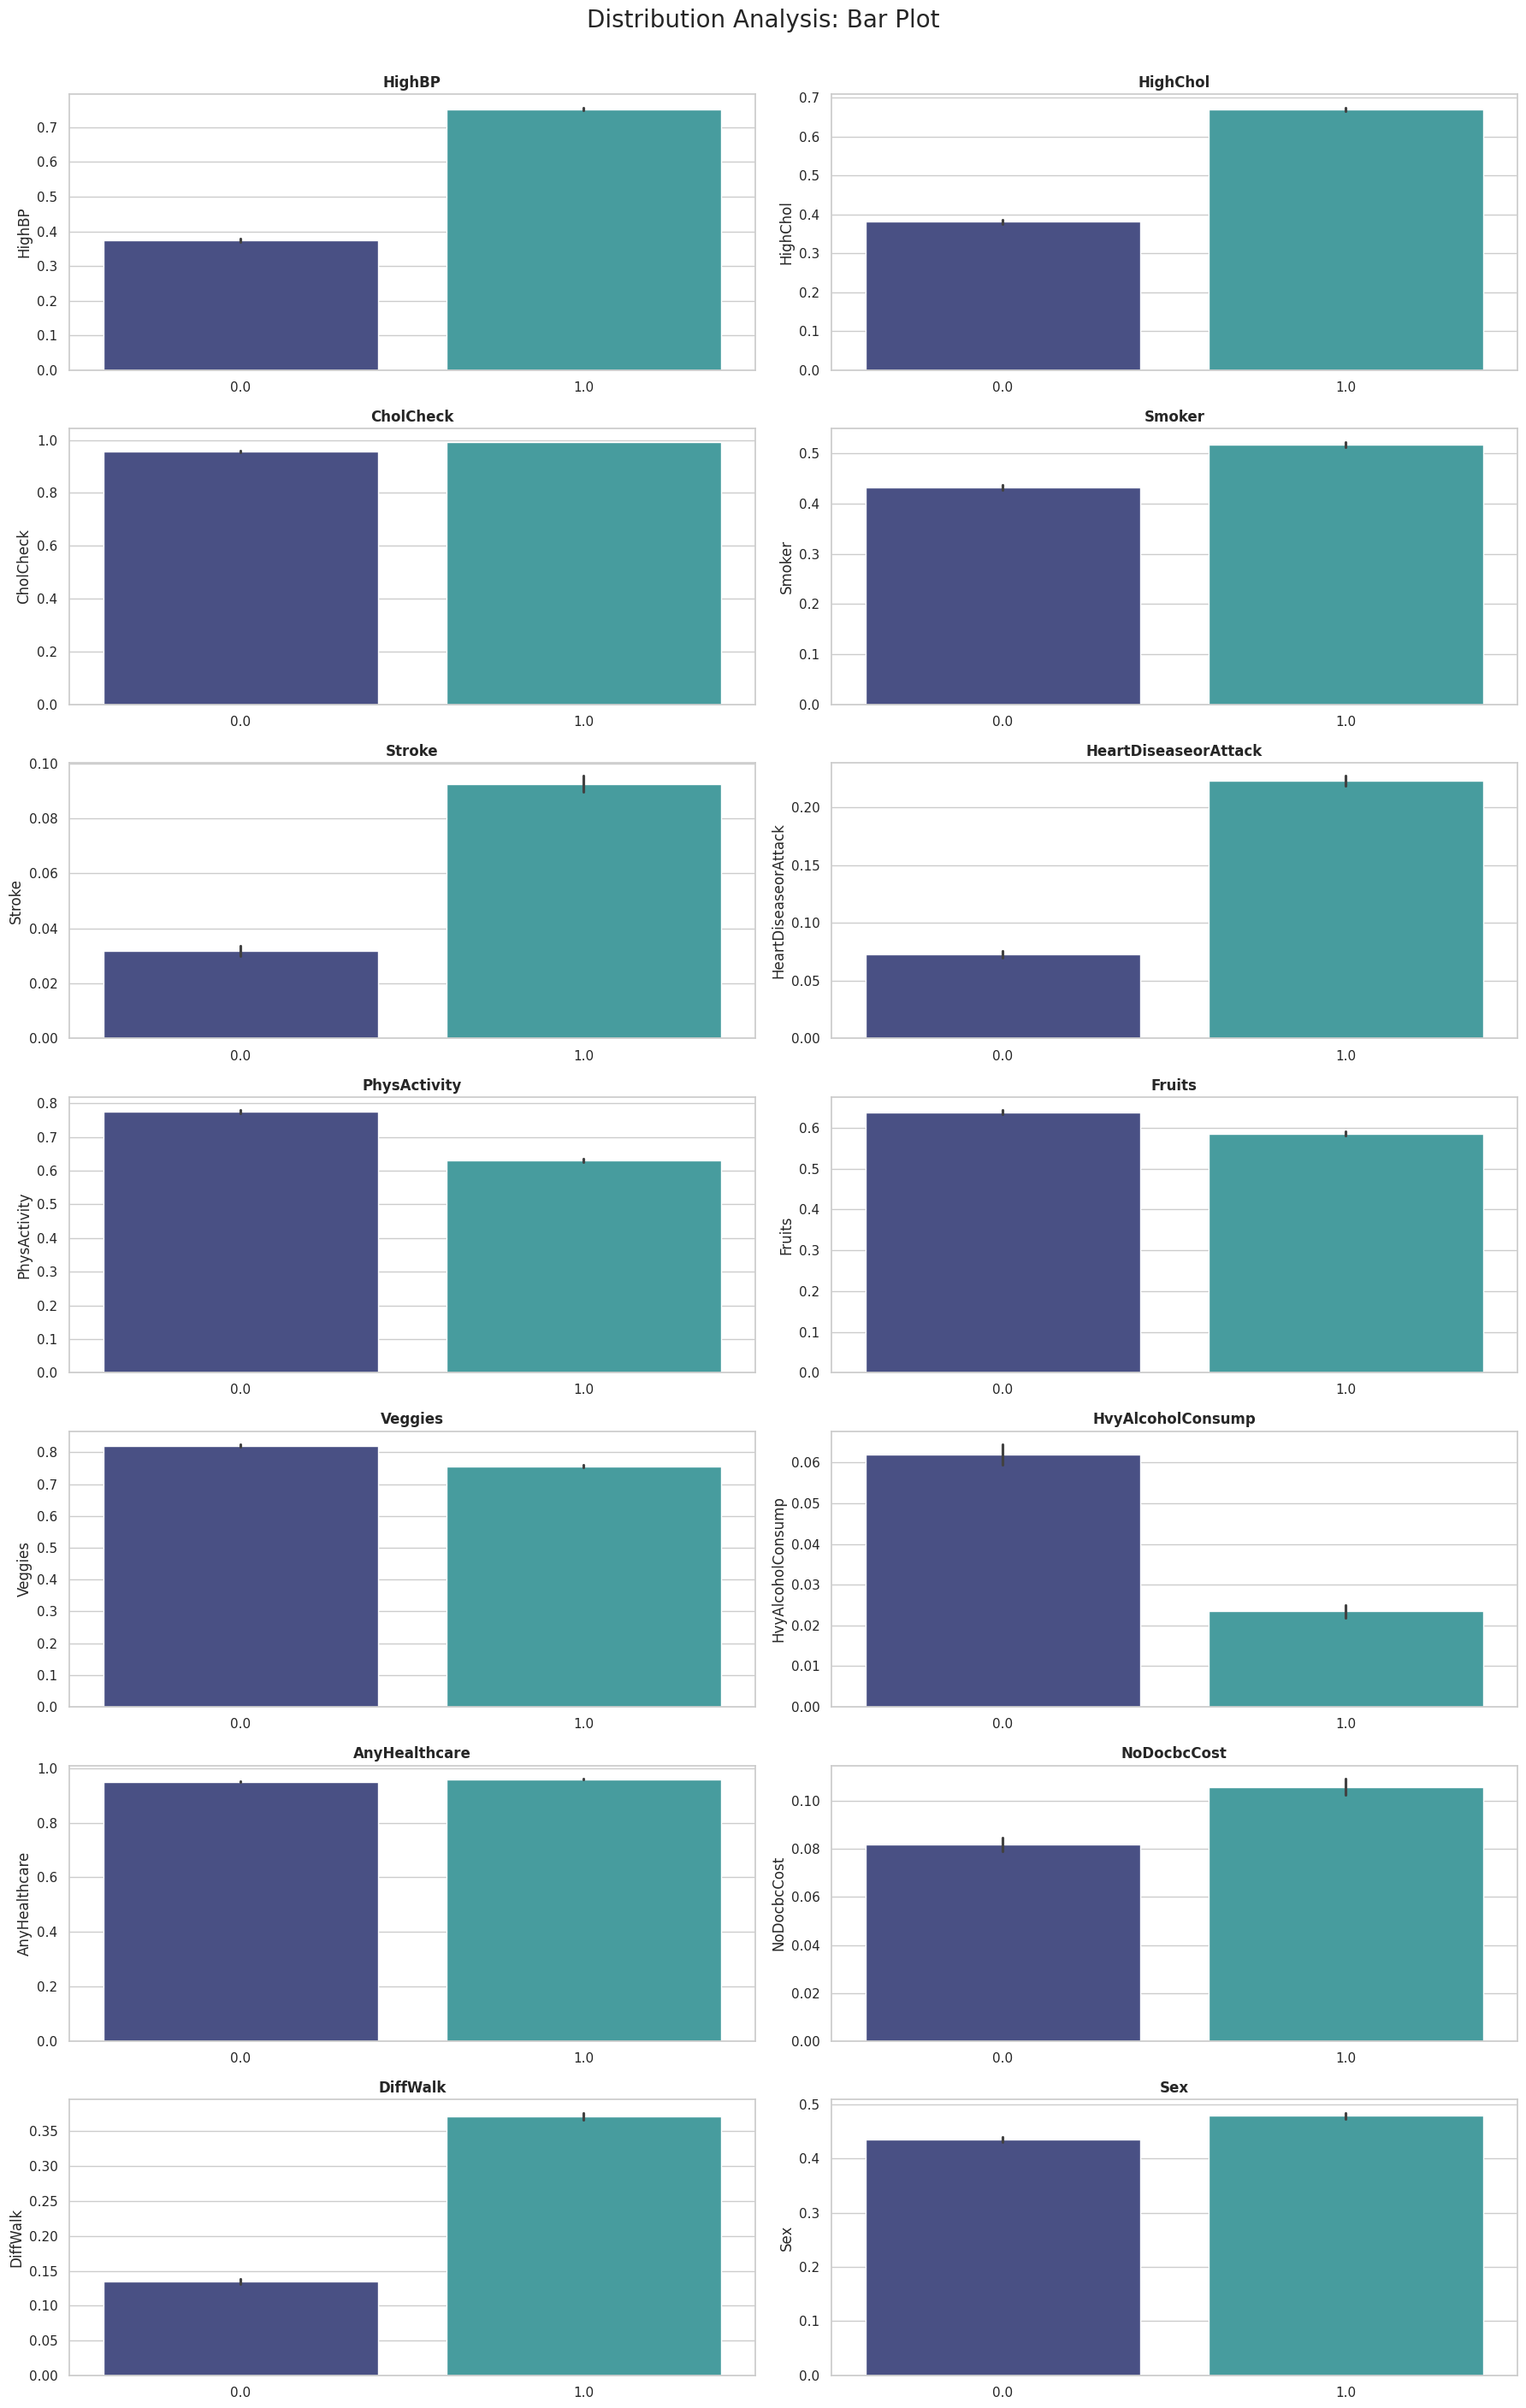

In [10]:
sns.set(style="whitegrid")
sns.set_palette("mako")

def plot_custom_grid(df, pairs, target_col, kind='box'):
    n_rows = len(pairs)
    n_cols = 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))

    plot_names = {'bar': 'Bar Plot', 'hist': 'Histogram Plot', 'kde': 'KDE Plot'}
    fig.suptitle(f'Distribution Analysis: {plot_names.get(kind, kind)}', fontsize=20, y=1.005)

    for i, (col_left, col_right) in enumerate(pairs):

        ax_l = axes[i, 0]
        if kind == 'bar':
            sns.barplot(data=df, x=target_col, y=col_left, ax=ax_l, palette='mako')
        elif kind == 'hist':
            sns.histplot(data=df, x=col_left, hue=target_col, kde=True, element="step", ax=ax_l, palette='mako')
        elif kind == 'kde':
            sns.kdeplot(data=df, x=col_left, hue=target_col, fill=True, ax=ax_l, palette='mako')

        ax_l.set_title(f'{col_left}', fontsize=12, fontweight='bold')
        ax_l.set_xlabel('')

        ax_r = axes[i, 1]
        if kind == 'bar':
            sns.barplot(data=df, x=target_col, y=col_right, ax=ax_r, palette='mako')
        elif kind == 'hist':
            sns.histplot(data=df, x=col_right, hue=target_col, kde=True, element="step", ax=ax_r, palette='mako')
        elif kind == 'kde':
            sns.kdeplot(data=df, x=col_right, hue=target_col, fill=True, ax=ax_r, palette='mako')

        ax_r.set_title(f'{col_right}', fontsize=12, fontweight='bold')
        ax_r.set_xlabel('')

    plt.tight_layout()
    plt.show()

plot_custom_grid(df, binary_feature_pairs, 'Diabetes_binary', kind='bar')

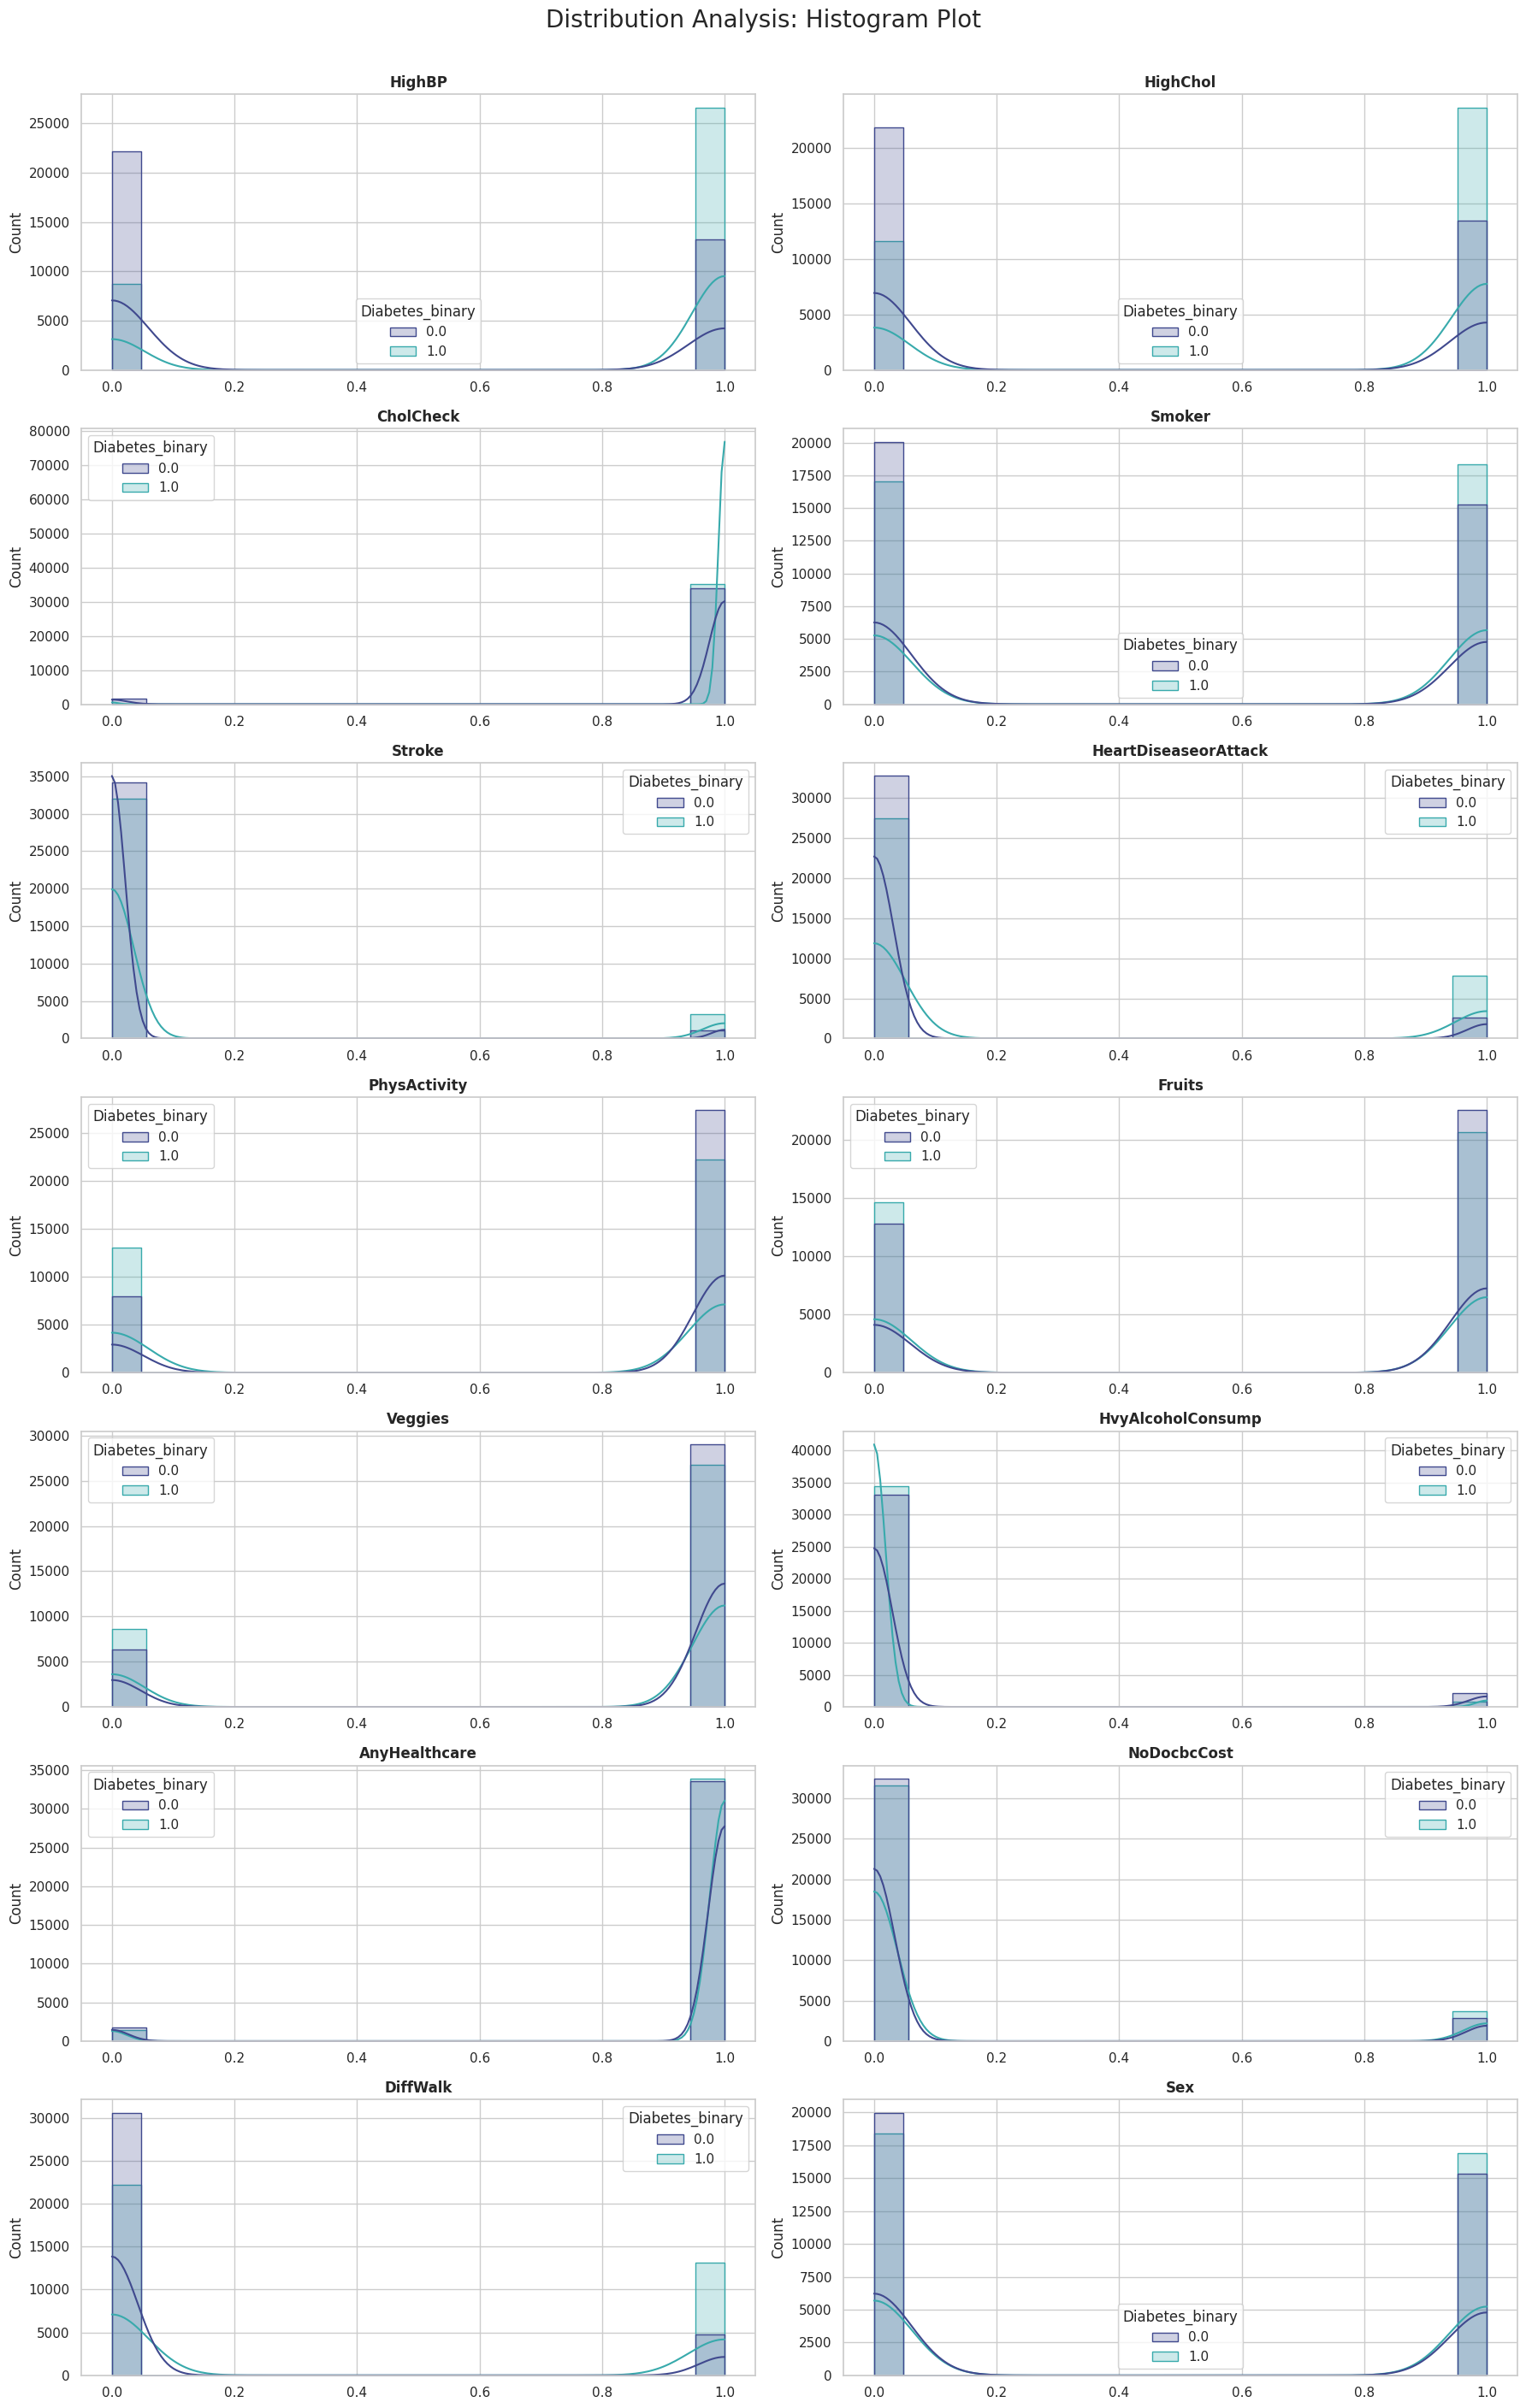

In [11]:
plot_custom_grid(df, binary_feature_pairs, 'Diabetes_binary', kind='hist')

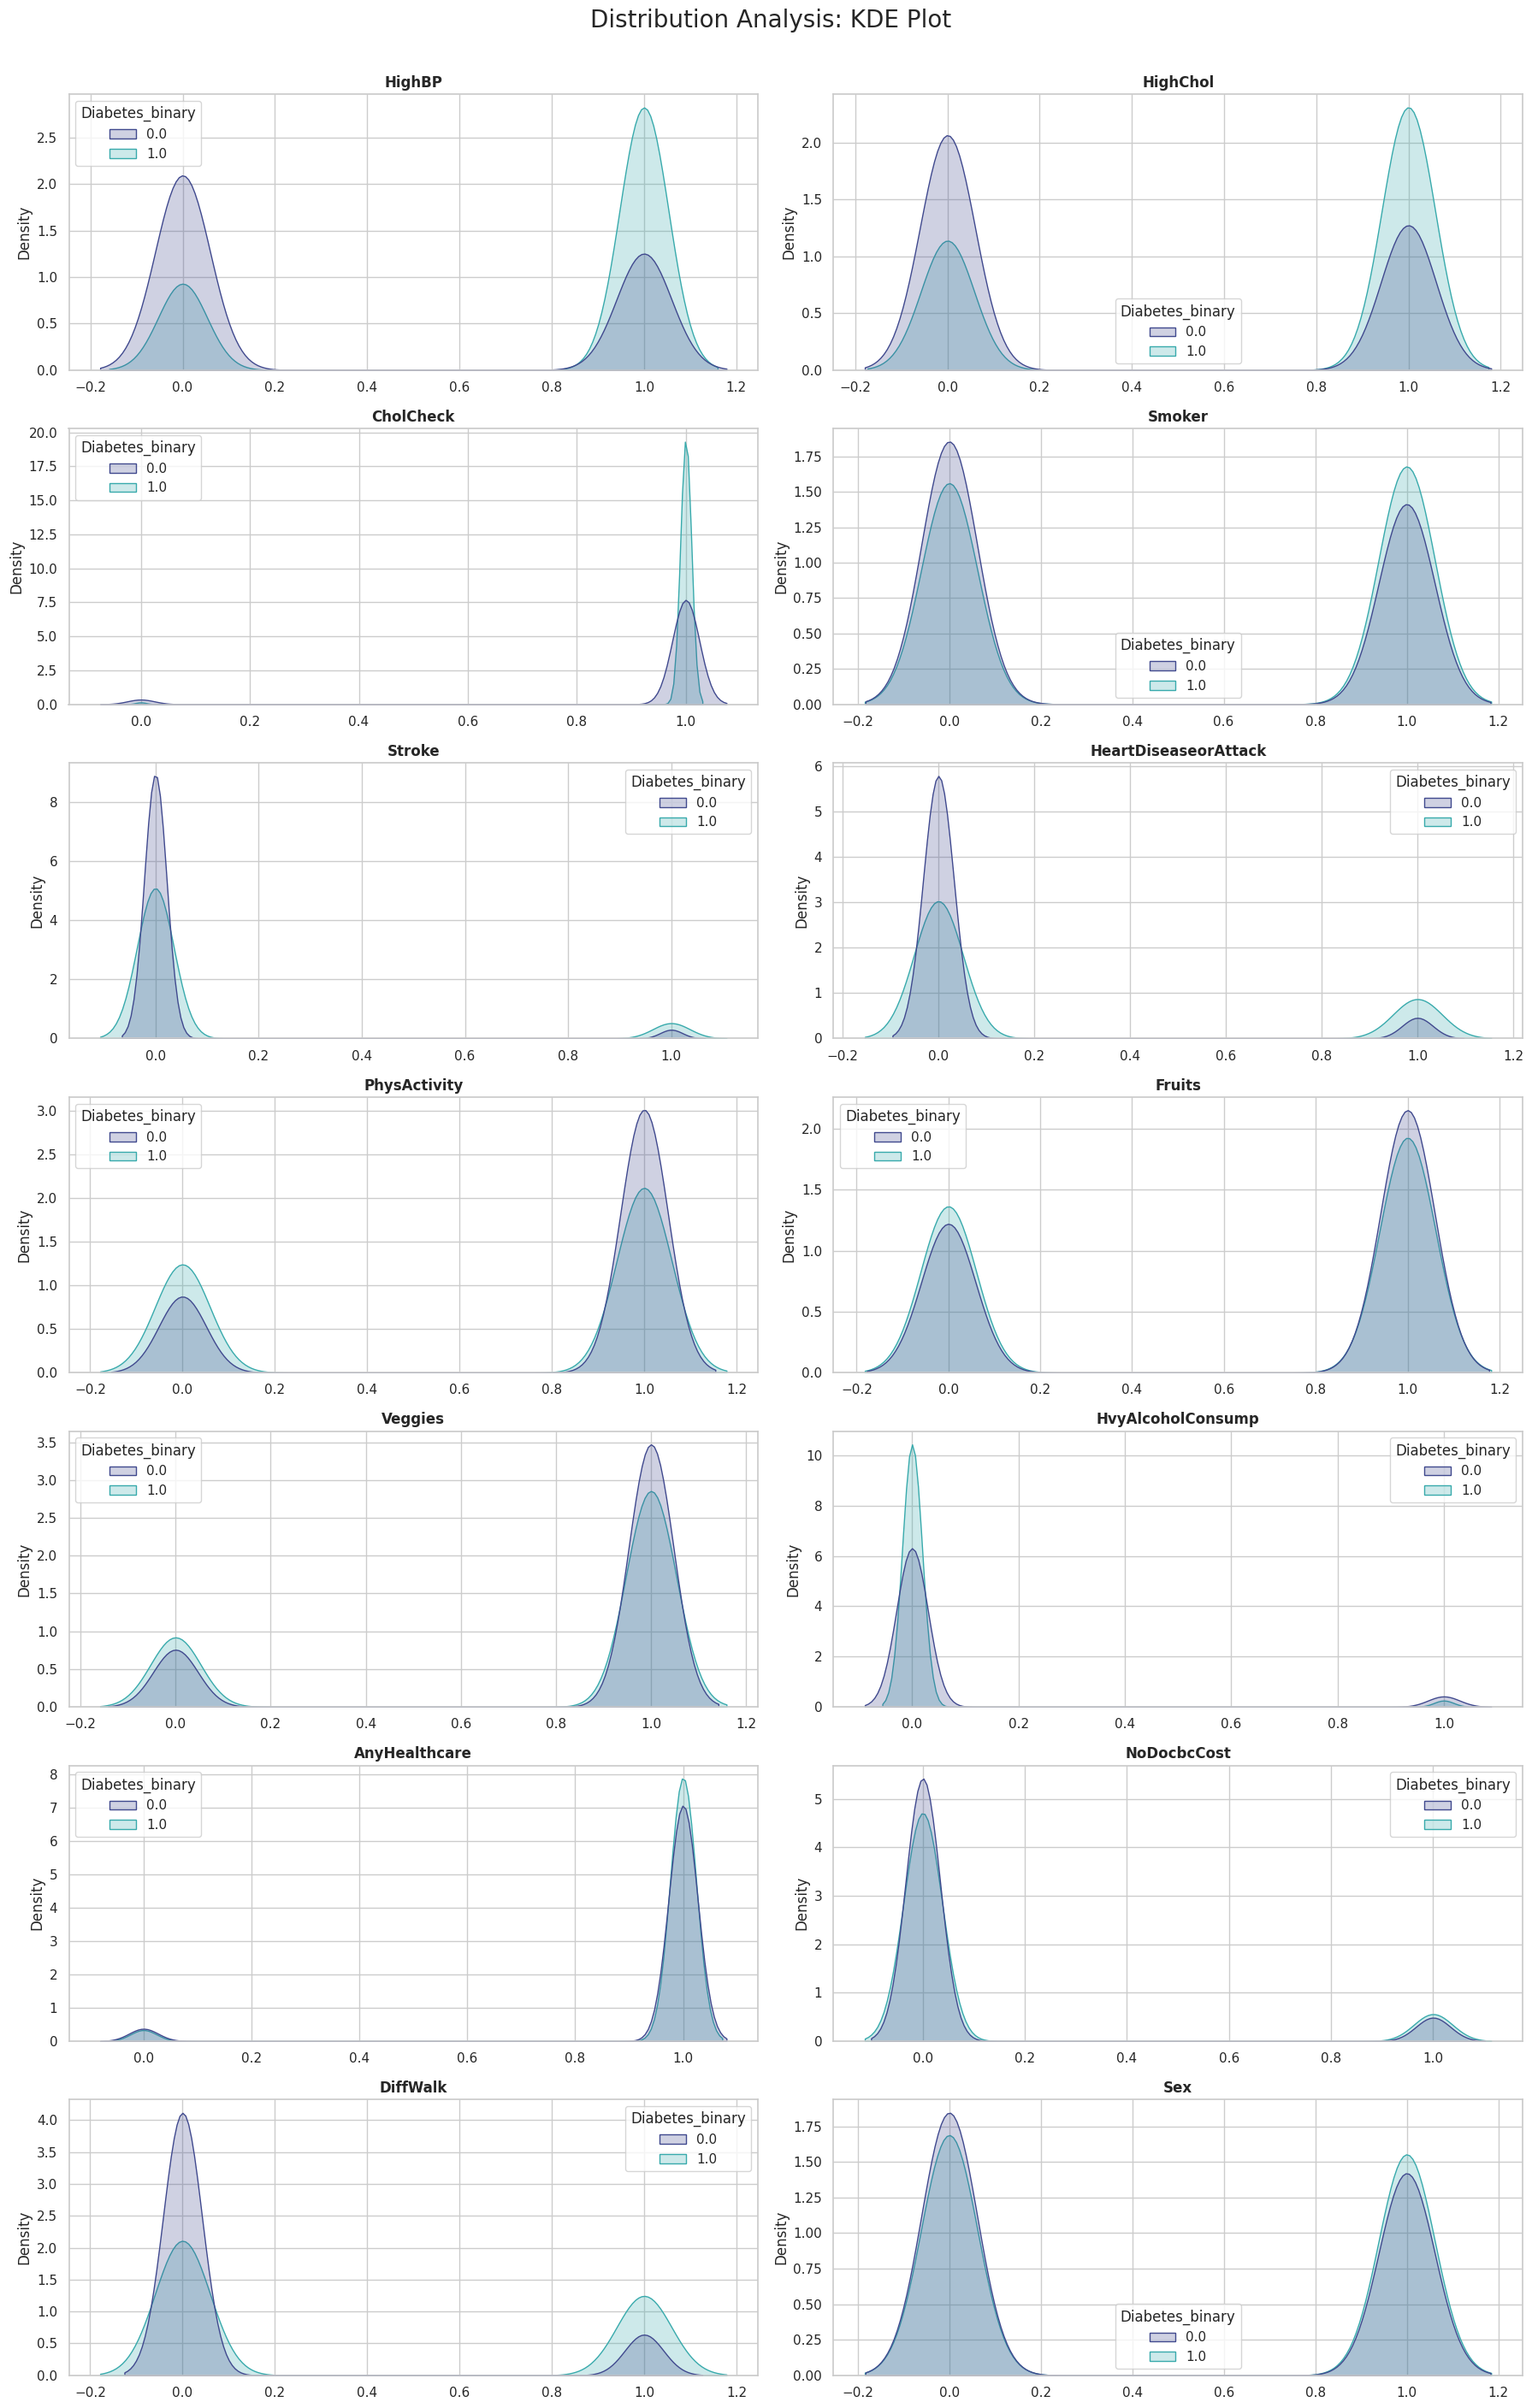

In [12]:
plot_custom_grid(df, binary_feature_pairs, 'Diabetes_binary', kind='kde')

ordinal vs target

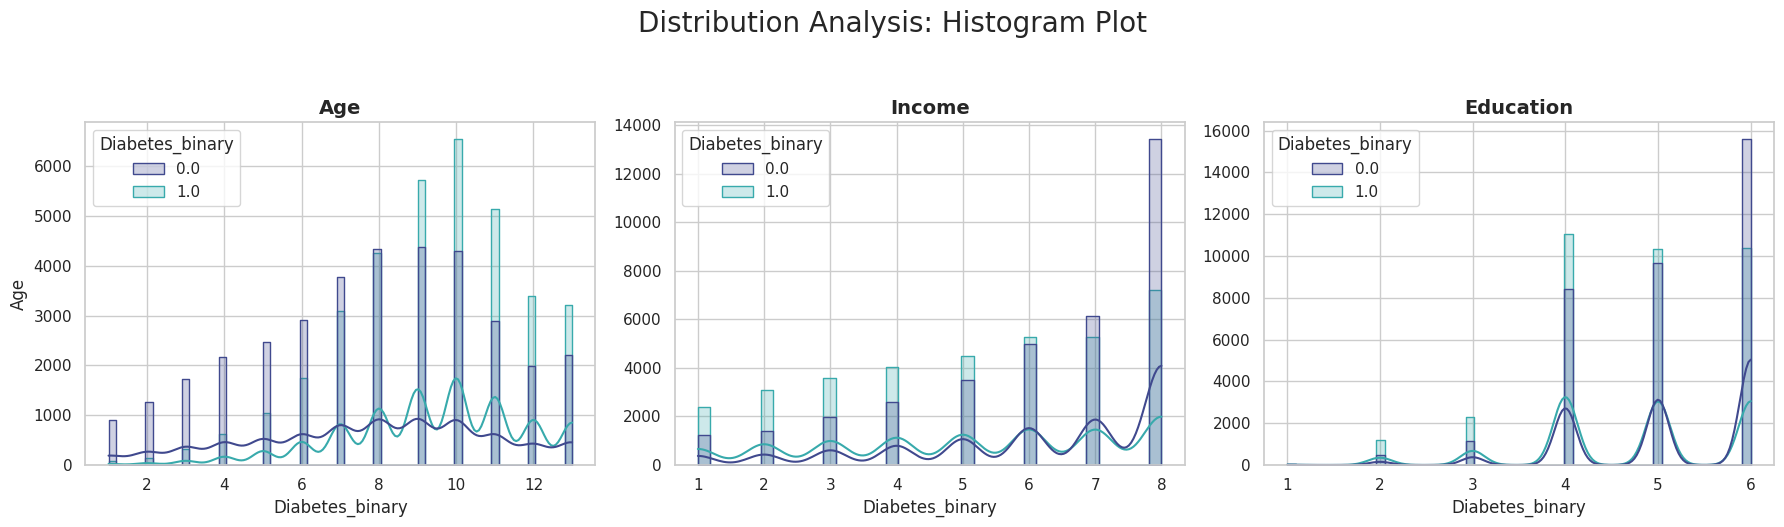

In [13]:
def plot_custom_grid(df, features, target_col, kind='hist'):
    sns.set(style="whitegrid")
    sns.set_palette("mako")

    n_cols = len(features)
    n_rows = 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5))

    plot_names = {'hist': 'Histogram Plot', 'kde': 'KDE Plot'}
    fig.suptitle(f'Distribution Analysis: {plot_names.get(kind, kind)}', fontsize=20, y=1.05)

    if n_cols == 1:
        axes = [axes]

    for i, col in enumerate(features):
        ax = axes[i]

        if kind == 'hist':
            sns.histplot(data=df, x=col, hue=target_col, kde=True, element="step", ax=ax, palette='mako')
        elif kind == 'kde':
            sns.kdeplot(data=df, x=col, hue=target_col, fill=True, ax=ax, palette='mako')

        ax.set_title(f'{col}', fontsize=14, fontweight='bold')
        ax.set_ylabel(col if i == 0 else '')
        ax.set_xlabel(target_col if kind == 'hist' else col)

    plt.tight_layout()
    plt.show()

plot_custom_grid(df, ordinal_features, 'Diabetes_binary', kind='hist')

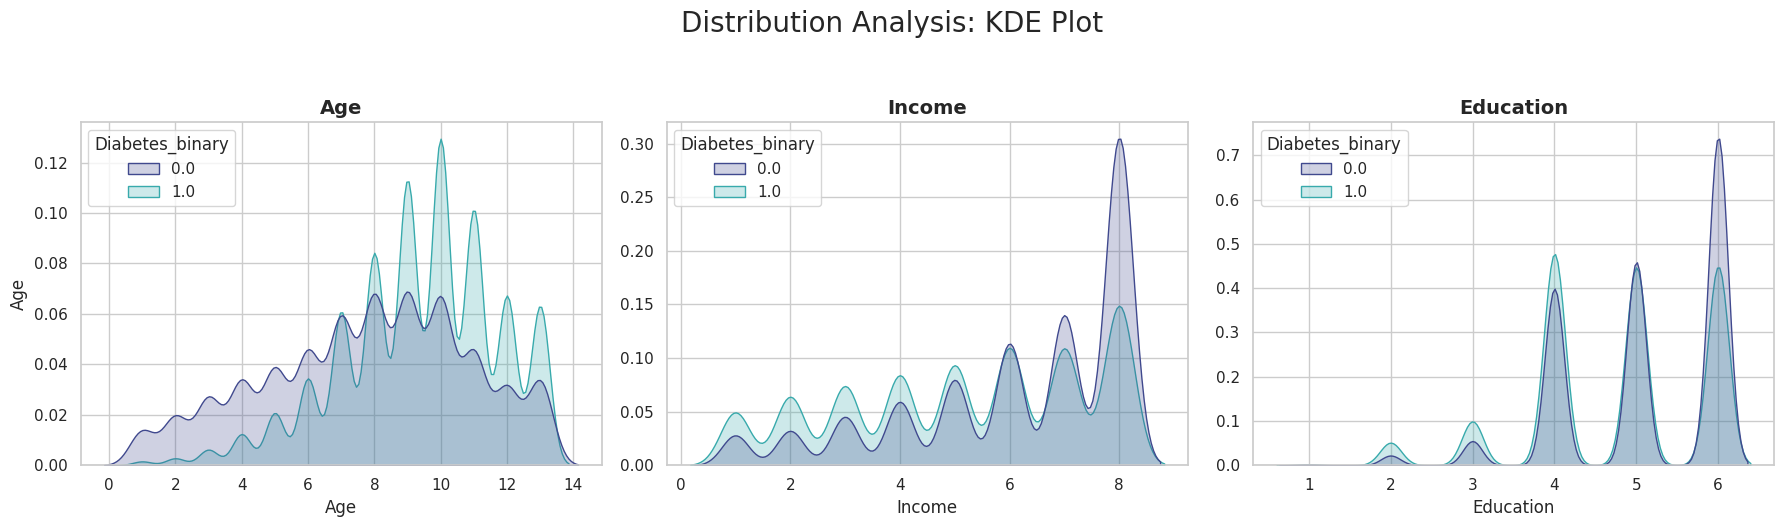

In [14]:
plot_custom_grid(df, ordinal_features, 'Diabetes_binary', kind='kde')

correlation heatmap

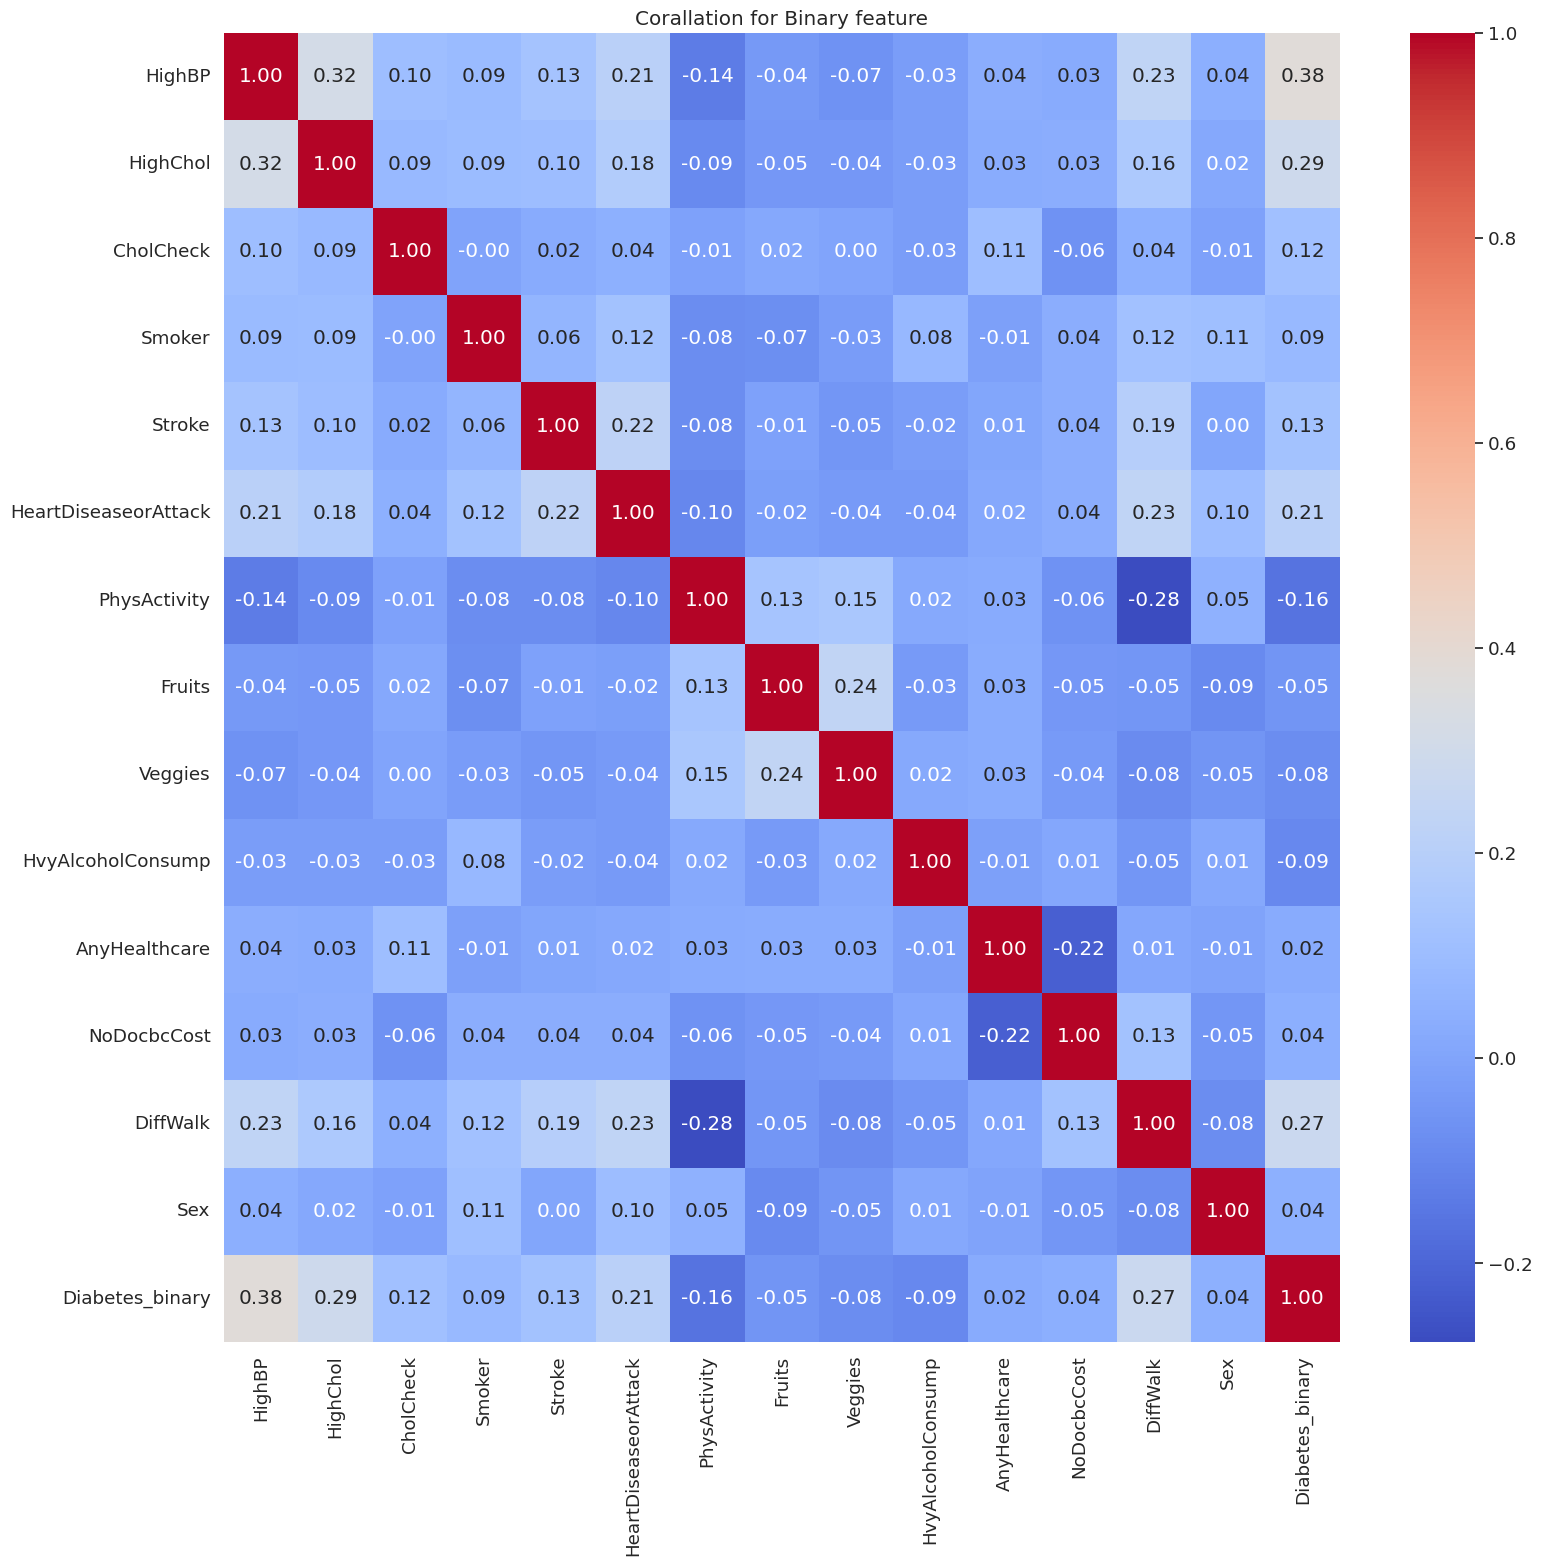

In [15]:
sns.set(style="whitegrid",
        font_scale=1.2)
plt.figure(figsize=(18,17))
sns.heatmap(df[binary_features + ["Diabetes_binary"]].corr(),
            annot=True,
            cmap="coolwarm",
            fmt='.2f')
plt.title("Corallation for Binary feature")
plt.show()

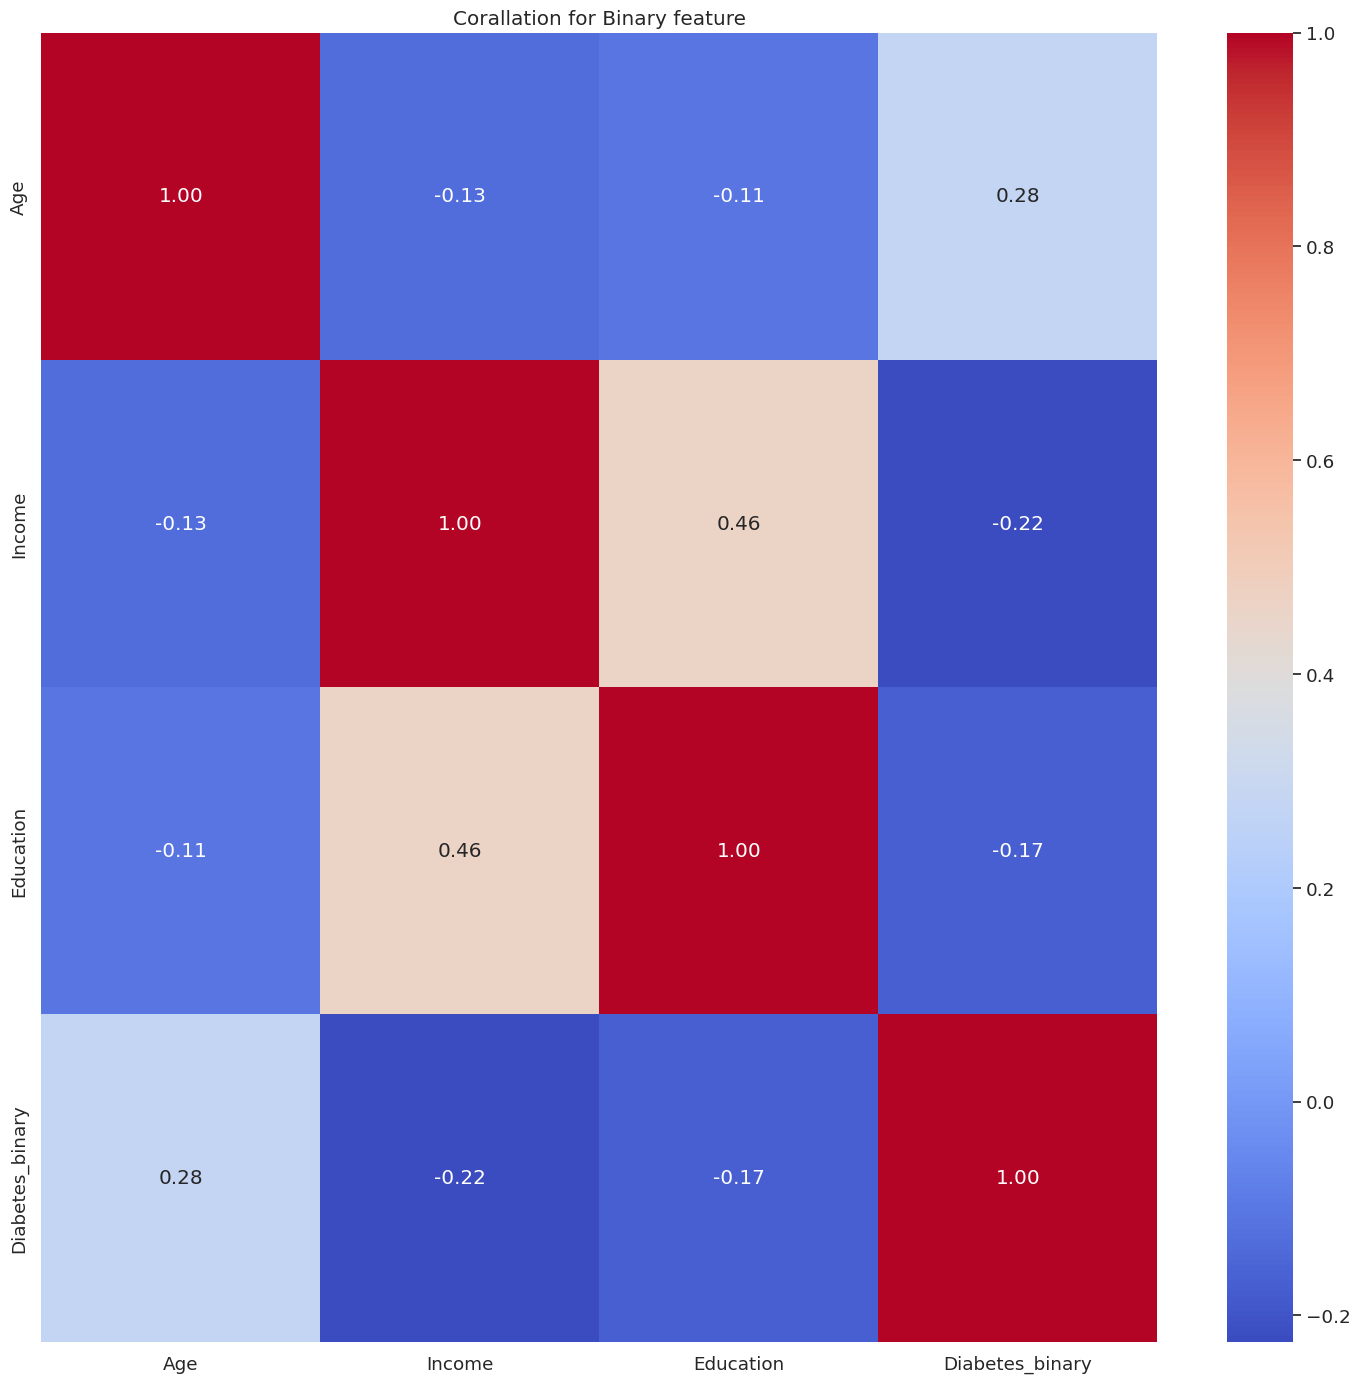

In [16]:
sns.set(style="whitegrid",
        font_scale=1.2)
plt.figure(figsize=(18,17))
sns.heatmap(df[ordinal_features + ["Diabetes_binary"]].corr(),
            annot=True,
            cmap="coolwarm",
            fmt='.2f')
plt.title("Corallation for Binary feature")
plt.show()

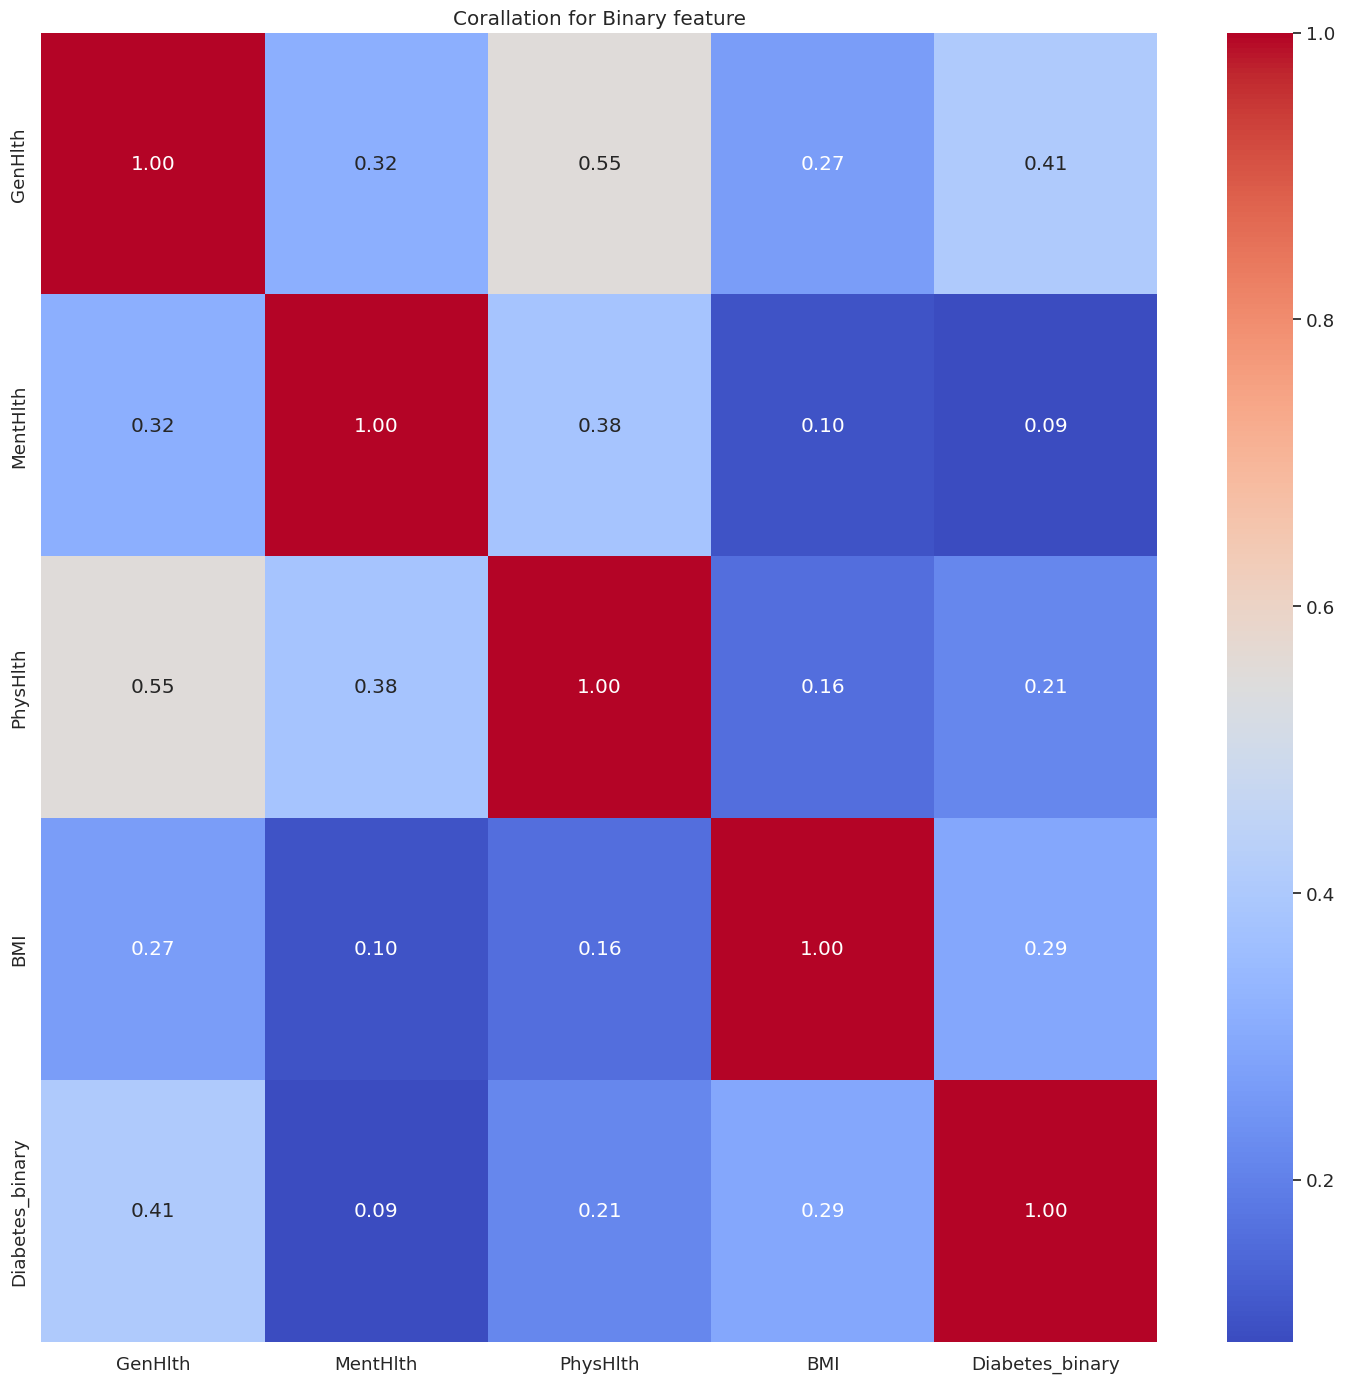

In [17]:
sns.set(style="whitegrid",
        font_scale=1.2)
plt.figure(figsize=(18,17))
sns.heatmap(df[countinous_features + ["Diabetes_binary"]].corr(),
            annot=True,
            cmap="coolwarm",
            fmt='.2f')
plt.title("Corallation for Binary feature")
plt.show()

## Training Model

In [18]:
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

X_test, X_train, y_test, y_train = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y)

In [19]:
nb_pipeline = Pipeline([
    ('classifier', GaussianNB())
])

nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('classifier', GaussianNB())])

pred n eval

In [20]:
y_pred = nb_pipeline.predict(X_test)
y_proba = nb_pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.73      0.72     28276
         1.0       0.73      0.72      0.72     28277

    accuracy                           0.72     56553
   macro avg       0.72      0.72      0.72     56553
weighted avg       0.72      0.72      0.72     56553



cm

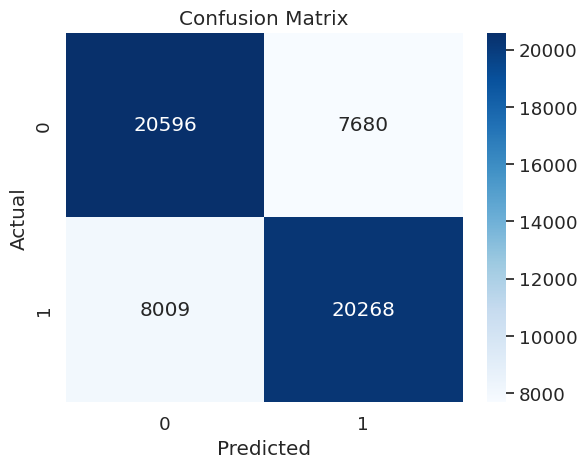

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ROC AUC

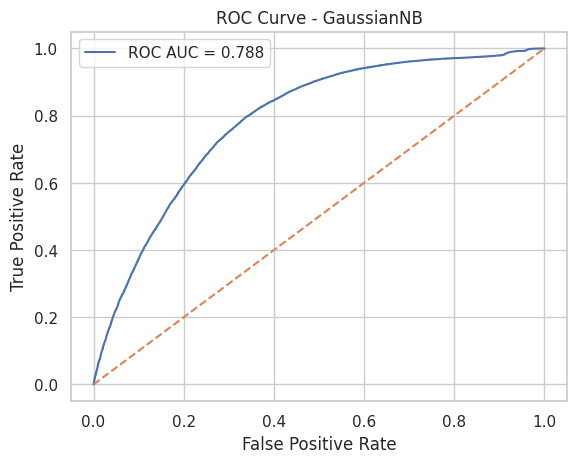

In [22]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

sns.set(style='whitegrid', font_scale=1.0)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GaussianNB')
plt.legend()
plt.show()

precision - recall

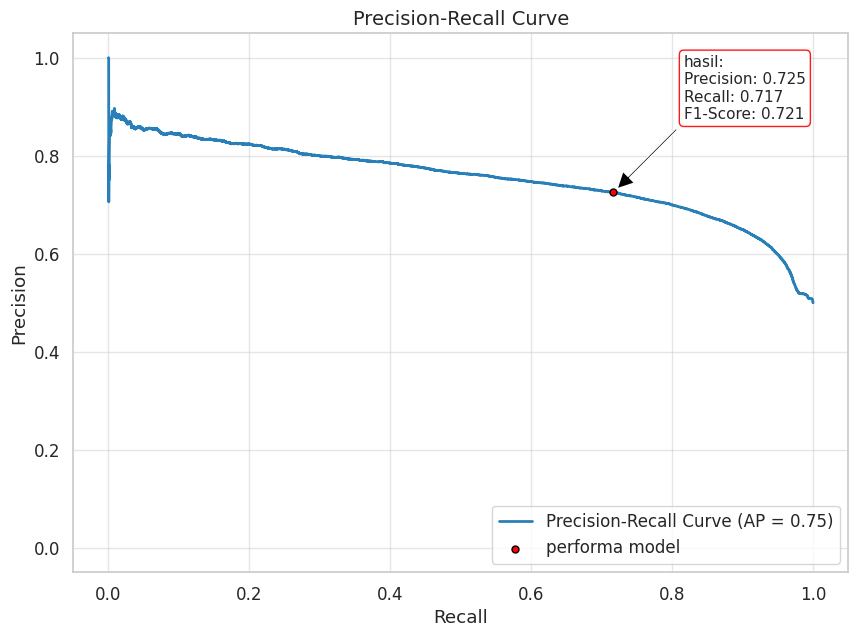

In [23]:
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
ap_score = average_precision_score(y_test, y_proba)

current_recall = recall_score(y_test, y_pred)
current_precision = precision_score(y_test, y_pred)
current_f1 = f1_score(y_test, y_pred)

sns.set(style='whitegrid', font_scale=1.1)
plt.figure(figsize=(10, 7))

#a
plt.plot(recall_curve, precision_curve, label=f'Precision-Recall Curve (AP = {ap_score:.2f})',
         linewidth=2, color='#2980b9')

#b
plt.scatter(current_recall, current_precision, marker='o', color='red', s=25,
            label='performa model', zorder=5, edgecolors='black')

#c
text_label = (f"hasil:\n"
              f"Precision: {current_precision:.3f}\n"
              f"Recall: {current_recall:.3f}\n"
              f"F1-Score: {current_f1:.3f}")

plt.annotate(text_label,
             xy=(current_recall, current_precision),
             xytext=(current_recall + 0.1, current_precision + 0.15),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.9),
             fontsize=11)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontsize=14)
plt.legend(loc='lower right')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.grid(True, alpha=0.5)

plt.show()